PyTorch is an open-source deep learning framework developed by Meta AI, widely recognized for its flexibility and Pythonic design. Here's a concise breakdown of its key features and applications:

**Core Features**  
- **Dynamic Computation Graphs**: Enables real-time graph modifications during execution, contrasting with static graph frameworks like TensorFlow[2][4]. This "eager execution" approach simplifies debugging using standard Python tools[4][6].  
- **GPU Acceleration**: Leverages NVIDIA's cuDNN/cuBLAS libraries for high-performance tensor operations, matching or exceeding TensorFlow's speed in many benchmarks[3][4].  
- **TorchScript**: Allows seamless conversion between eager mode (for development) and optimized graph mode (for production deployment)[1][3].  
- **Autograd System**: Implements reverse-mode auto-differentiation through a tape-based mechanism for efficient gradient calculations[3][5].  

**Development Advantages**  
- **Python Integration**: Feels native to Python developers, with API similarities to NumPy and support for common scientific libraries[5][6].  
- **Research Focus**: Preferred in academia for rapid prototyping due to its modular design and dynamic nature[2][4].  
- **Mobile Deployment**: Supports end-to-end workflows from Python to iOS/Android applications[1][3].  

**Ecosystem & Community**  
- **Growing Adoption**: Has surpassed TensorFlow in popularity among researchers, with a 28% decline in TensorFlow usage reported in 2025[5][6].  
- **Rich Resources**: Extensive official documentation, tutorials, and third-party libraries (e.g., torchvision, Hugging Face Transformers)[5][6].  

**Performance Considerations**  
- **Benchmarks**: Shows competitive training speeds for models like ResNet-50 and MobileNet compared to TensorFlow[4].  
- **Scalability**: Supports distributed training and multi-GPU configurations for large-scale applications[3][6].  

While TensorFlow remains strong in production environments, PyTorch dominates research contexts due to its intuitive interface and flexibility[2][4][6]. For new projects, its balance of usability and performance makes it a compelling choice across both academic and industrial applications[1][5].

Citations:
[1] https://ai.meta.com/tools/pytorch/
[2] https://builtin.com/data-science/pytorch-vs-tensorflow
[3] https://docs.nvidia.com/deeplearning/frameworks/pytorch-release-notes/overview.html
[4] https://viso.ai/deep-learning/pytorch-vs-tensorflow/
[5] https://www.dataquest.io/blog/pytorch-for-deep-learning/
[6] https://opencv.org/blog/pytorch-vs-tensorflow/
[7] https://www.usdsi.org/data-science-insights/resources/pytorch-deep-learning-framework
[8] https://www.reddit.com/r/MLQuestions/comments/112sege/pytorch_vs_tensorflow/
[9] https://www.techtarget.com/searchenterpriseai/definition/PyTorch


**short summary comparing Keras (with TensorFlow backend) and PyTorch**:

---

| Feature              | **Keras (with TensorFlow)**                    | **PyTorch**                                |
|----------------------|-----------------------------------------------|---------------------------------------------|
| **Ease of Use**      | Very beginner-friendly, high-level API        | More code control, slightly steeper learning curve |
| **Model Building**   | Functional/sequential API + subclassing       | Dynamic computation graph, very flexible     |
| **Debugging**        | Harder (static graphs) — better with `tf.function` | Easier (eager execution by default)         |
| **Community & Docs** | Large community, extensive documentation       | Strong research community, growing fast     |
| **Deployment**       | Great support via TensorFlow Serving, TF Lite | TorchServe is improving but less mature     |
| **Popularity**       | More used in production/enterprise (Google-backed) | More popular in research (Facebook-backed)  |

---

✅ **Use Keras/TensorFlow** for fast prototyping + production-ready workflows.  
✅ **Use PyTorch** if you want low-level control and flexibility for research or custom training loops.

Would you like a sample model in both to compare side-by-side?

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [2]:
# Data preprocessing: normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) #using mean and std values of 0.5 applies 0 to 1 normalization
])

# Loading the dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)


In [3]:
print(f'Training data: {len(train_dataset):,} images')

Training data: 60,000 images


In [4]:

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Printing the shape of the datasets
print(f'Training data: {len(train_dataset)} samples')
print(f'Testing data: {len(test_dataset)} samples')


Training data: 60000 samples
Testing data: 10000 samples


In [5]:

image, label = train_dataset[3]  # Replace 'random_index' with an actual integer index
print(image, label)

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -0.7412, -0.2471,  0.3725,  0.2235, -0.4980, -0.8902,
          -0.5765,  0.0745,  0.6000,  0.5216, -0.2000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.4275,
           0.4588,  0.3882,  0.4353,  0.3725,  0.4745,  0.8196,  1.0000,
           0.7490,  0.7176,  0.5216,  0.4039,  0.4588,  0.6706,  0.1451,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.7255,  0.2784,
           0.0980,  0.1765,  0.1922,  0.1765,  0.1451,  0.3725,  0.3725,
           0.3569,  0.3412,  0.2235,  0.1922,  0.1608,  0.0118,  0.2235,
           0.0980, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000,  0.1765,  0.1137,
           0.0980,  0.1922,  0.2549,  0.2235,  0

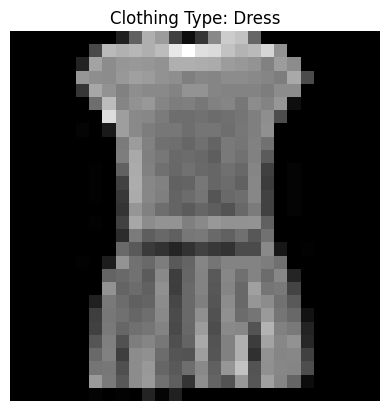

In [6]:
# Transform image back to a format suitable for display
image = image.squeeze(0)  

# Get clothing type based on label
clothing_types = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
clothing_type = clothing_types[label]

# Plot the image with label
plt.imshow(image, cmap='gray')
plt.title(f"Clothing Type: {clothing_type}")
plt.axis('off')
plt.show()

In [7]:
class CNN(nn.Module): #The CNN class inherits from nn.Module and defines the architecture of the neural network.
    def __init__(self):
        # we'll build 1 conv layer with max pooling
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)  # 1 input channel, 32 output channels, 3x3 kernel
        self.pool = nn.MaxPool2d(2, 2)  # 2x2 pooling
        self.fc1 = nn.Linear(13*13*32, 100)  # Flattened dimensions after pooling - done manually
        self.fc2 = nn.Linear(100, 10)  # 10 classes for FashionMNIST
#The forward method defines the forward pass of the network, specifying how input data flows through the layers
    def forward(self, x):
        x = self.conv1(x)
        x = nn.ReLU()(x)
        x = self.pool(x)
        x = x.view(-1, 13*13*32)  # Flatten
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        return nn.Softmax(dim=1)(x)

model = CNN()

The flattened dimensions in this CNN (13x13x32) are determined by calculating how the input image size changes after passing through the convolutional and pooling layers. Let me break down the calculation step by step:

### Starting Dimensions
For FashionMNIST dataset, the input images are 28×28 pixels with 1 channel.

### After First Convolutional Layer (self.conv1)
- Input: 28×28×1
- Filter: 3×3 with stride 1, no padding
- Output size calculation: (Input size - Filter size + 2×Padding)/Stride + 1
- Width and height: (28 - 3 + 0)/1 + 1 = 26
- Output: 26×26×32 (32 output channels defined in conv1)

### After Pooling Layer (self.pool)
- Input: 26×26×32
- Pool size: 2×2
- Output size calculation: Input size/Pool size
- Width and height: 26/2 = 13
- Output: 13×13×32

### Flattening for Fully Connected Layer
- The 3D tensor (13×13×32) is flattened into a 1D vector
- Total elements: 13×13×32 = 5,408
- This is why the input to fc1 is 13*13*32

The dimensions could be calculated programmatically, but here they were likely worked out manually or through debugging. In more complex networks, developers often use print statements to check tensor dimensions at each step:

```python
def forward(self, x):
    x = self.conv1(x)
    print("After conv1:", x.shape)
    x = nn.ReLU()(x)
    x = self.pool(x)
    print("After pooling:", x.shape)
    # rest of the code
```


The dynamic approach makes the code more robust to input size changes or architecture modifications.

### Dynamic Approach

In [8]:
def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, 3, 1)  # 1 input channel, 32 output channels, 3x3 kernel, stride 1
    self.pool = nn.MaxPool2d(2, 2)       # 2x2 pooling with stride 2
    
    # Calculate the flattened dimension dynamically
    with torch.no_grad():  # Disable gradient tracking for this calculation
        # Create a sample input tensor with the expected input dimensions
        # (batch_size=1, channels=1, height=28, width=28) for FashionMNIST
        dummy_input = torch.zeros(1, 1, 28, 28)
        
        # Apply convolution to the dummy input
        x = self.conv1(dummy_input)  # Shape becomes [1, 32, 26, 26]
        
        # Apply pooling to the result
        x = self.pool(x)  # Shape becomes [1, 32, 13, 13]
        
        # Calculate the total number of features after flattening
        # Size(0) is batch dimension, so we multiply sizes 1, 2, and 3 (channels, height, width)
        flattened_size = x.size(1) * x.size(2) * x.size(3)  # 32 * 13 * 13 = 5408
        
        print(f"Dynamically calculated flattened size: {flattened_size}")
    
    # Create fully connected layers using the dynamically calculated input size
    self.fc1 = nn.Linear(flattened_size, 100)  # Connect flattened input to 100 neurons
    self.fc2 = nn.Linear(100, 10)              # Connect to 10 output classes (FashionMNIST)

def forward(self, x):
    # Pass input through convolutional layer
    x = self.conv1(x)            # Apply 32 convolutional filters
    x = nn.ReLU()(x)             # Apply ReLU activation
    x = self.pool(x)             # Apply max pooling
    
    # Flatten the 3D tensor (channels, height, width) to a 1D vector
    # -1 in the first dimension means "infer this dimension from the tensor's size"
    batch_size = x.size(0)       # Get the batch size
    x = x.view(batch_size, -1)   # Reshape to [batch_size, flattened_size]
    
    # Pass through fully connected layers
    x = self.fc1(x)              # First fully connected layer
    x = nn.ReLU()(x)             # Apply ReLU activation
    x = self.fc2(x)              # Output layer
    return nn.Softmax(dim=1)(x)  # Apply softmax to get class probabilities

In [9]:
# Setting up the loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model for 10 epochs
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for images, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Calculate loss
        running_loss += loss.item()
        
        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    # Calculate epoch metrics
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct_predictions / total_predictions
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

Epoch 1/10, Loss: 1.7087, Accuracy: 75.50%
Epoch 2/10, Loss: 1.5818, Accuracy: 88.03%
Epoch 3/10, Loss: 1.5669, Accuracy: 89.53%
Epoch 4/10, Loss: 1.5576, Accuracy: 90.39%
Epoch 5/10, Loss: 1.5505, Accuracy: 91.12%
Epoch 6/10, Loss: 1.5468, Accuracy: 91.47%
Epoch 7/10, Loss: 1.5409, Accuracy: 92.04%
Epoch 8/10, Loss: 1.5372, Accuracy: 92.42%
Epoch 9/10, Loss: 1.5343, Accuracy: 92.69%
Epoch 10/10, Loss: 1.5316, Accuracy: 92.99%


In [8]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Model accuracy on test set: {accuracy}%")

Model accuracy on test set: 90.08%


## Saving The Model

In [ ]:

# Save the model (optional)
torch.save(model.state_dict(), 'fashion_mnist_cnn.pt')

In [ ]:
# Load the saved model
model = FashionCNN()  # Create a new model instance
model.load_state_dict(torch.load('fashion_mnist_cnn.pt'))
model.eval()  # Set the model to evaluation mode (optional)

# Flowers Data

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Define the device (GPU or CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define the data transforms
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Load the Flowers dataset
train_dataset = datasets.ImageFolder('flowers/train', data_transforms['train'])
val_dataset = datasets.ImageFolder('flowers/val', data_transforms['val'])

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the CNN model
class FlowerCNN(nn.Module):
    def __init__(self):
        super(FlowerCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.max_pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256*56*56, 128)
        self.fc2 = nn.Linear(128, 5)  # 5 classes: daisy, dandelion, roses, sunflowers, tulips

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.max_pool(x)
        x = torch.relu(self.conv2(x))
        x = self.max_pool(x)
        x = torch.relu(self.conv3(x))
        x = self.max_pool(x)
        x = x.view(-1, 256*56*56)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, optimizer, and loss function
model = FlowerCNN()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(10):
    model.train()
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Epoch {epoch+1}, Batch {batch_idx+1}, Loss: {loss.item()}')

    model.eval()
    val_loss = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()

    accuracy = correct / len(val_loader.dataset)
    print(f'Epoch {epoch+1}, Val Loss: {val_loss / len(val_loader)}, Val Acc: {accuracy:.2f}%')